In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#import the data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# explore the data

In [25]:
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


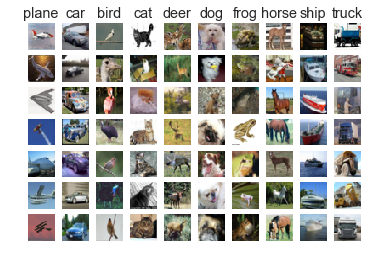

In [26]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# preprocess the data

In [27]:
#shuffle the training data
import numpy as np
shuffle_index = np.random.permutation(50000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [28]:
from sklearn.preprocessing import StandardScaler  
x_train =np.reshape(x_train, (50000,3072))
y_train=np.reshape(y_train, (50000,))
x_test =np.reshape(x_test, (10000,3072))
y_test =np.reshape(y_test, (10000,))
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# train the model using random forest classifier

In [31]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
              
ML_model = RandomForestClassifier(random_state= 32)
ML_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [36]:
# Traning Accuracy calculation
score = cross_val_score(ML_model, x_train, y_train, cv= 3)
training_accuracy = score.mean() * 100;
print('Traning Accuracy is = ' + str(training_accuracy) + '%')


Traning Accuracy is = 34.29597633894589%


In [37]:
# Test Error calculation 
Test_pred_y = ML_model.predict(x_test);
test_accuracy = sum(Test_pred_y == y_test); 
print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');

Generalization Accuracy = 36.14%


In [38]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, Test_pred_y)
print('---------------Confusion Matrix--------------')
print(conf_mat)

---------------Confusion Matrix--------------
[[540  57  81  40  28  20  20  36 135  43]
 [ 83 462  43  59  42  40  37  35  69 130]
 [134  52 316  94 133  77  85  53  29  27]
 [ 86  90 135 230  83 137 107  71  17  44]
 [ 71  56 203  98 297  56 119  59  21  20]
 [ 59  59 144 181  94 276  76  66  21  24]
 [ 38  72 157 118 125  72 356  28  13  21]
 [ 81  93 113 113  96  77  51 276  24  76]
 [163 112  34  36  29  38  22  24 493  49]
 [105 220  40  42  24  34  32  53  82 368]]


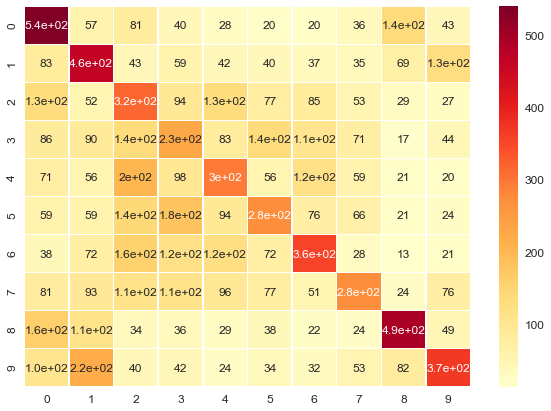

In [39]:
# visulaising confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlOrRd')# font size
plt.show()
